In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data.csv
sample_submission.csv



In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

# Load Dataset
data = pd.read_csv('../input/data.csv')
data.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [6]:
# Convert some columns to category type
data.set_index('shot_id', inplace=True)
data["action_type"] = data["action_type"].astype('object')
data["combined_shot_type"] = data["combined_shot_type"].astype('category')
data["game_event_id"] = data["game_event_id"].astype('category')
data["game_id"] = data["game_id"].astype('category')
data["period"] = data["period"].astype('object')
data["playoffs"] = data["playoffs"].astype('category')
data["season"] = data["season"].astype('category')
data["shot_made_flag"] = data["shot_made_flag"].astype('category')
data["shot_type"] = data["shot_type"].astype('category')
data["team_id"] = data["team_id"].astype('category')

In [7]:
data.head(2)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


In [8]:
data.dtypes

action_type             object
combined_shot_type    category
game_event_id         category
game_id               category
lat                    float64
loc_x                    int64
loc_y                    int64
lon                    float64
minutes_remaining        int64
period                  object
playoffs              category
season                category
seconds_remaining        int64
shot_distance            int64
shot_made_flag        category
shot_type             category
shot_zone_area          object
shot_zone_basic         object
shot_zone_range         object
team_id               category
team_name               object
game_date               object
matchup                 object
opponent                object
dtype: object

In [9]:
data.shape

(30697, 24)

In [10]:
# Take a look at numerical columns statistics
data.describe(include=["number"])

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437
std,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000


In [11]:
# Then for the categorical columns
data.describe(include=['object','category'])

,action_type,combined_shot_type,game_event_id,game_id,period,playoffs,season,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,25697.0,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,57,6,620,1559,7,2,20,2.0,2,6,7,5,1,1,1559,74,33
top,Jump Shot,Jump Shot,2,21501228,3,0,2005-06,0.0,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,1610612747,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,132,50,8296,26198,2318,14232.0,24271,13455,12625,9398,30697,30697,50,1020,1978


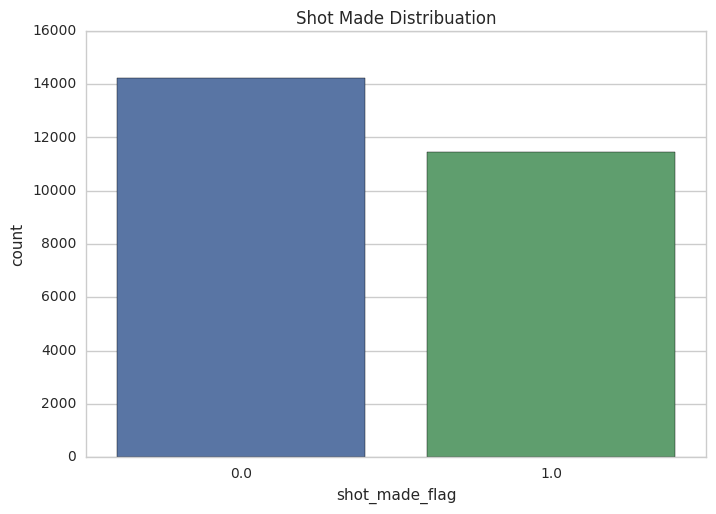

In [12]:
# Virtualize shot distributation
ax = plt.axes()
sns.countplot(x='shot_made_flag', data=data, ax=ax)
ax.set_title("Shot Made Distribuation")
plt.show()

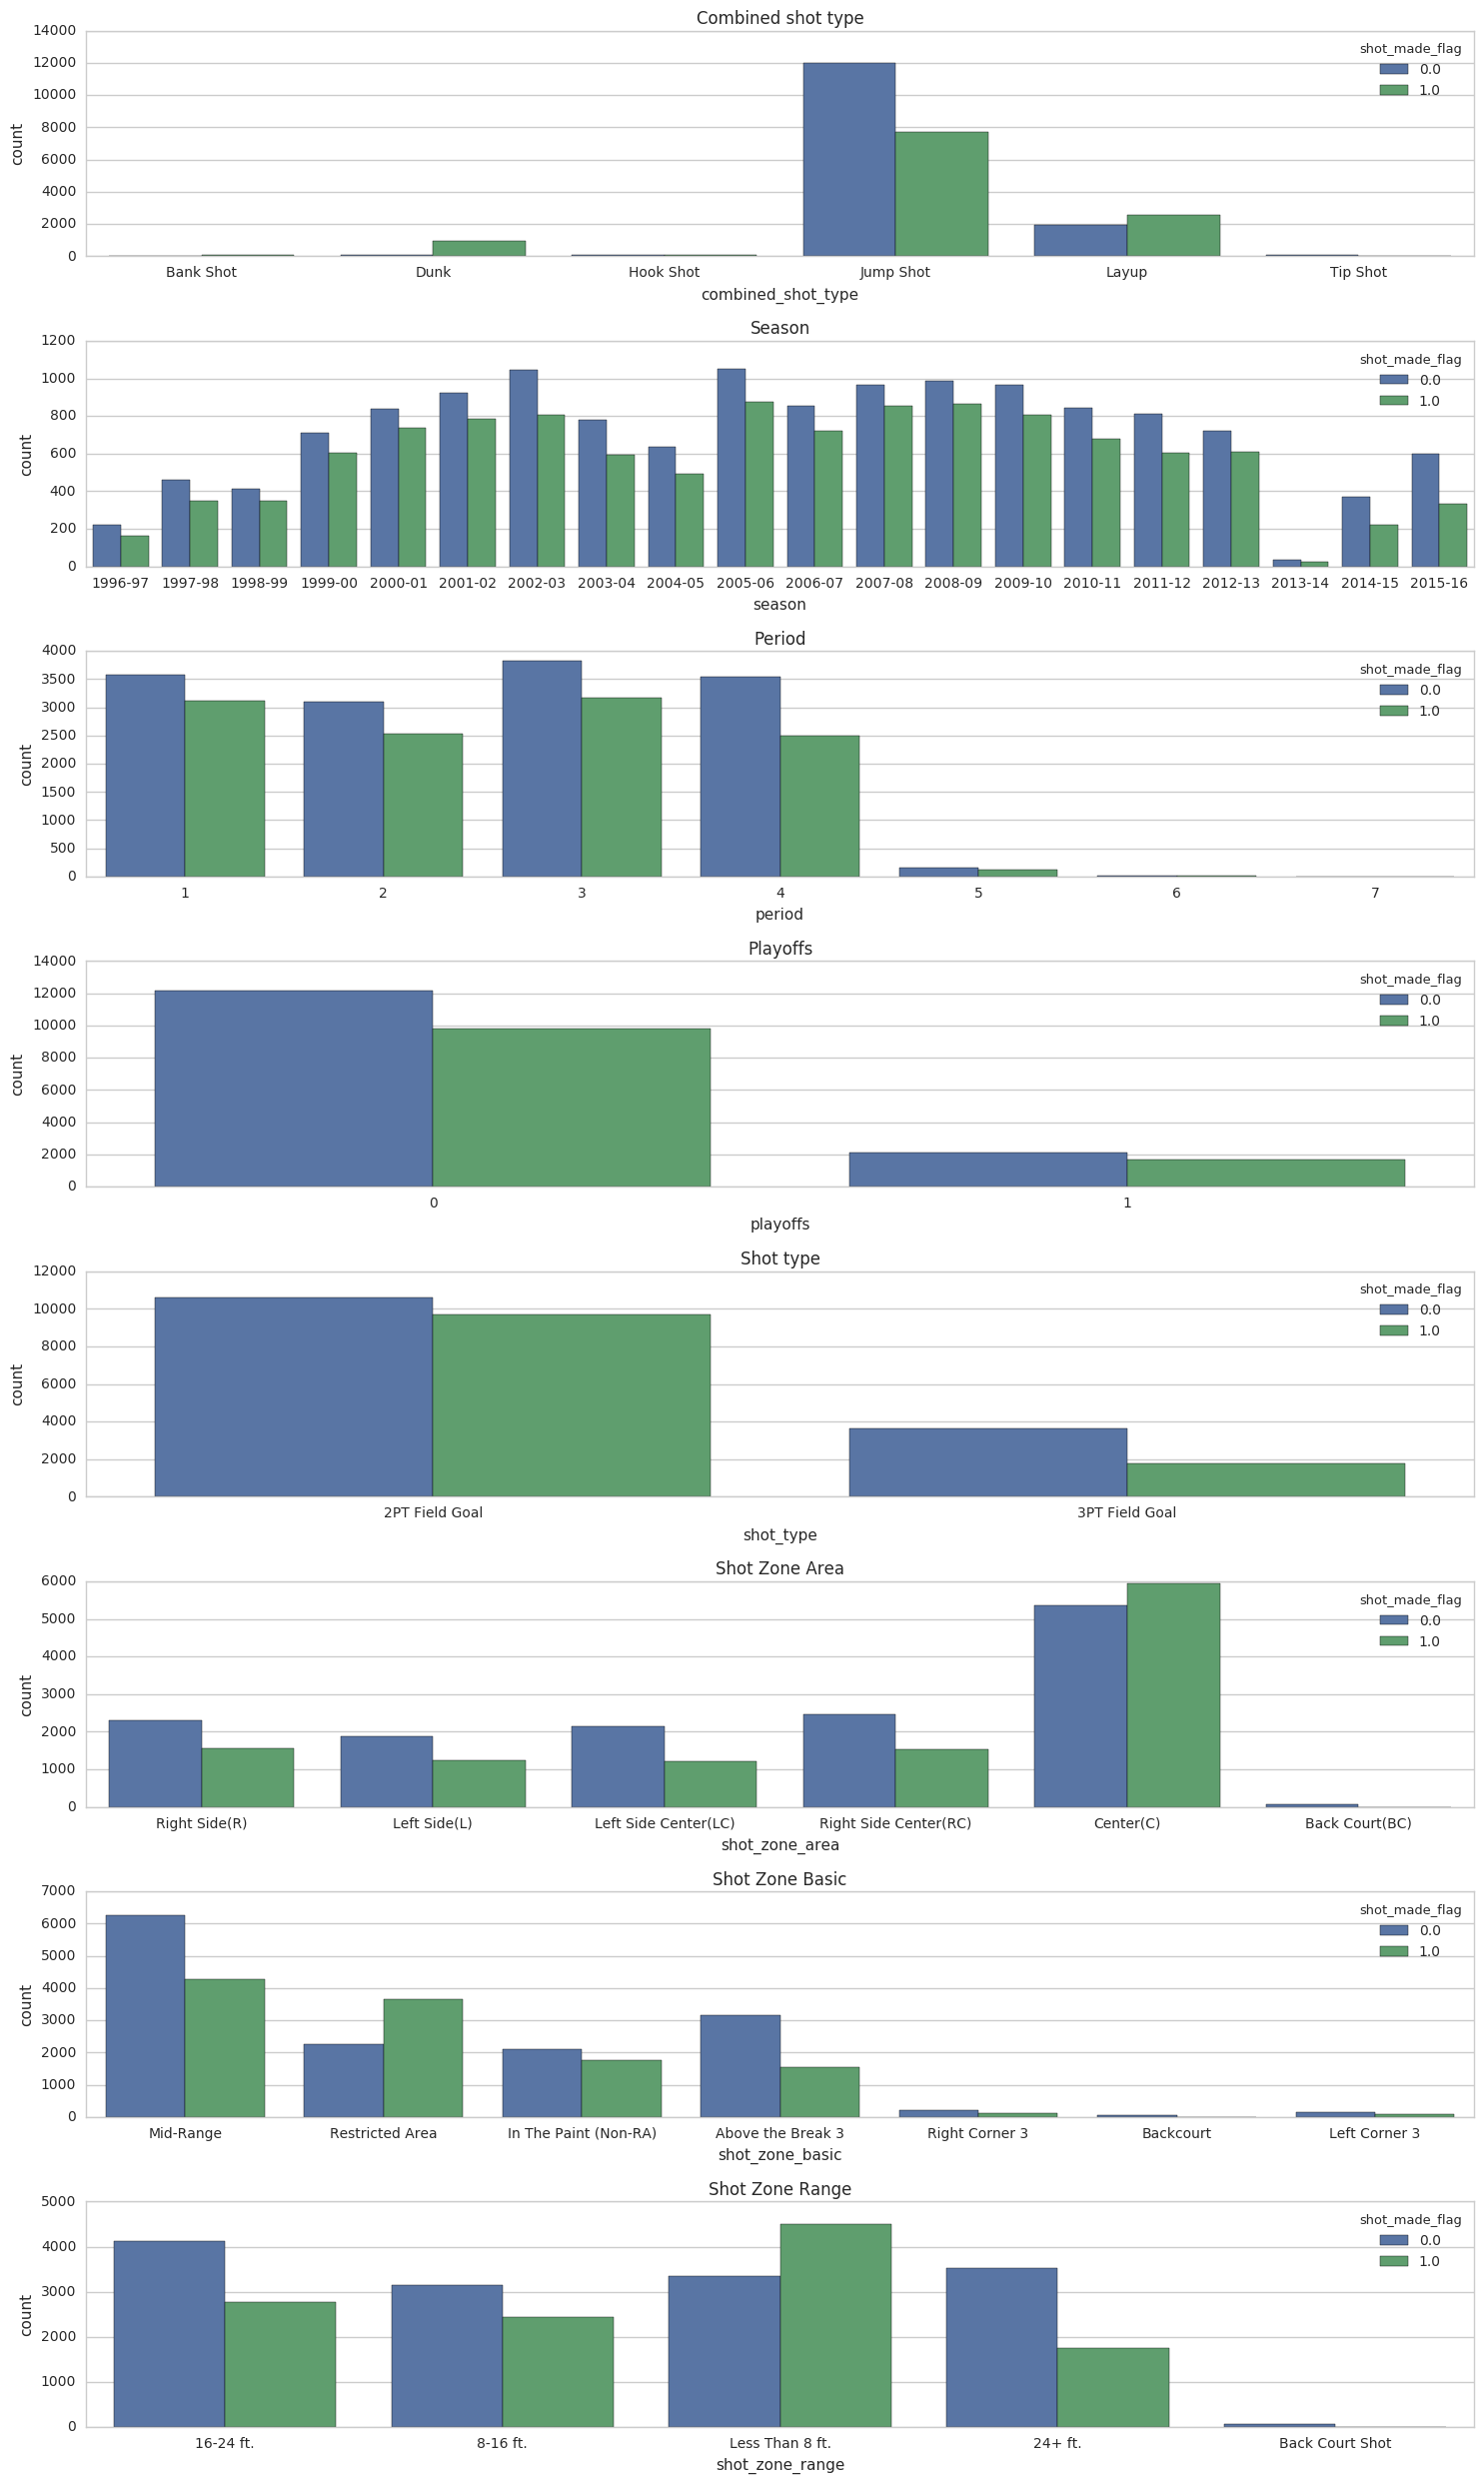

In [13]:
# Describle analysisi based on different features

f, axarr = plt.subplots(8, figsize=(15, 25))

sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=data, ax=axarr[0])
sns.countplot(x="season", hue="shot_made_flag", data=data, ax=axarr[1])
sns.countplot(x="period", hue="shot_made_flag", data=data, ax=axarr[2])
sns.countplot(x="playoffs", hue="shot_made_flag", data=data, ax=axarr[3])
sns.countplot(x="shot_type", hue="shot_made_flag", data=data, ax=axarr[4])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=data, ax=axarr[5])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=data, ax=axarr[6])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=data, ax=axarr[7])

axarr[0].set_title("Combined shot type")
axarr[1].set_title("Season")
axarr[2].set_title("Period")
axarr[3].set_title("Playoffs")
axarr[4].set_title("Shot type")
axarr[5].set_title("Shot Zone Area")
axarr[6].set_title("Shot Zone Basic")
axarr[7].set_title("Shot Zone Range")

plt.tight_layout()
plt.show()

In [14]:
# Store Shot made flag is null
unknown_mask = data["shot_made_flag"].isnull()

# Make a copy of data
data_cp = data.copy()
target = data_cp["shot_made_flag"].copy()

# Remove unrelated columns

data_cp.drop("team_id", axis=1, inplace=True) # Only one number
data_cp.drop("lat", axis=1, inplace=True) # Correlated to loc_x
data_cp.drop("lon", axis=1, inplace=True) # Correlated to loc_y
data_cp.drop("game_id", axis=1, inplace=True) # Independent 
data_cp.drop("game_event_id", axis=1, inplace=True) # Independent
data_cp.drop("team_name", axis=1, inplace=True) # Only LA lakers
data_cp.drop("shot_made_flag", axis=1, inplace=True) # For predict

In [15]:
data_cp.dtypes

action_type             object
combined_shot_type    category
loc_x                    int64
loc_y                    int64
minutes_remaining        int64
period                  object
playoffs              category
season                category
seconds_remaining        int64
shot_distance            int64
shot_type             category
shot_zone_area          object
shot_zone_basic         object
shot_zone_range         object
game_date               object
matchup                 object
opponent                object
dtype: object

In [16]:
# Function to Remove outliers
def detect_outliers(series, whis=1.5):
    q75, q25 = np.percentile(series, [75,25])
    iqr = q75 - q25
    return ~((series - series.median()).abs() <= (whis * iqr))

In [17]:
data_cp["seconds_from_period_end"] = 60 * data_cp["minutes_remaining"] + data_cp["seconds_remaining"]
data_cp["last_5_sec_in_period"] = data_cp["seconds_from_period_end"] < 5

data_cp.drop("minutes_remaining", axis=1, inplace=True)
data_cp.drop("seconds_remaining", axis=1, inplace=True)
data_cp.drop("seconds_from_period_end", axis=1, inplace=True)

data_cp["home_play"] = data_cp["matchup"].str.contains('vs').astype('int')
data_cp.drop('matchup', axis=1, inplace=True)

data_cp['game_date'] = pd.to_datetime(data_cp['game_date'])
data_cp['game_year'] = data_cp['game_date'].dt.year
data_cp['game_month'] = data_cp['game_date'].dt.month
data_cp.drop('game_date', axis=1, inplace=True)

In [18]:
data_cp['loc_x'] = pd.cut(data_cp['loc_x'], 25)
data_cp['loc_y'] = pd.cut(data_cp['loc_y'], 25)

rare_action_types = data_cp['action_type'].value_counts().sort_values().index.values[:20]

In [19]:
data_cp.loc[data_cp['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

In [20]:
categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'loc_x', 'loc_y'
]

In [21]:
# Function to get dummies and append to dataset
for cc in categorial_cols:
    dummies = pd.get_dummies(data_cp[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    data_cp.drop(cc, axis=1, inplace=True)
    data_cp = data_cp.join(dummies)

In [23]:
data_submit = data_cp[unknown_mask]

X = data_cp[~unknown_mask]
Y = target[~unknown_mask]

In [24]:
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2

In [25]:
threshold = 0.9
vt = VarianceThreshold().fit(X)

In [26]:
# Select features from Data
feature_var_threshold = data_cp.columns[vt.variances_ > threshold * (1-threshold)]
feature_var_threshold

Index(['playoffs', 'shot_distance', 'home_play', 'action_type#Jump Shot',
       'combined_shot_type#Jump Shot', 'combined_shot_type#Layup', 'period#1',
       'period#2', 'period#3', 'period#4', 'shot_type#2PT Field Goal',
       'shot_type#3PT Field Goal', 'shot_zone_area#Center(C)',
       'shot_zone_area#Left Side Center(LC)', 'shot_zone_area#Left Side(L)',
       'shot_zone_area#Right Side Center(RC)', 'shot_zone_area#Right Side(R)',
       'shot_zone_basic#Above the Break 3',
       'shot_zone_basic#In The Paint (Non-RA)', 'shot_zone_basic#Mid-Range',
       'shot_zone_basic#Restricted Area', 'shot_zone_range#16-24 ft.',
       'shot_zone_range#24+ ft.', 'shot_zone_range#8-16 ft.',
       'shot_zone_range#Less Than 8 ft.', 'game_month#1', 'game_month#2',
       'game_month#3', 'game_month#4', 'game_month#11', 'game_month#12',
       'loc_x#(-10.96, 8.96]', 'loc_y#(-10.6, 22.8]', 'loc_y#(22.8, 56.2]',
       'loc_y#(123, 156.4]'],
      dtype='object')

In [27]:
# Using Random Forest Classifier model
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier

In [28]:
model = RandomForestClassifier()
model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [30]:
# Find important features
feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feature_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feature_imp_20

Index(['shot_distance', 'action_type#Jump Shot', 'home_play', 'period#1',
       'period#3', 'period#2', 'period#4', 'action_type#Layup Shot',
       'game_month#1', 'game_month#3', 'shot_zone_basic#Restricted Area',
       'game_month#2', 'game_month#4', 'game_month#12', 'playoffs',
       'game_month#11', 'shot_zone_area#Center(C)', 'opponent#PHX',
       'opponent#DEN', 'opponent#MIN'],
      dtype='object')

In [32]:
# Prepare features for chi2 test
from sklearn.preprocessing import MinMaxScaler

X_minmax = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k="all").fit(X_minmax, Y)

feature_scoring = pd.DataFrame({
    'feature': X.columns,
    'score': X_scored.scores_
})
feature_scored_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values
feature_scored_20

array(['combined_shot_type#Dunk', 'action_type#Jump Shot',
       'shot_zone_basic#Restricted Area', 'loc_x#(-10.96, 8.96]',
       'action_type#Driving Layup Shot', 'shot_zone_range#Less Than 8 ft.',
       'loc_y#(-10.6, 22.8]', 'action_type#Slam Dunk Shot',
       'shot_type#3PT Field Goal', 'action_type#Driving Dunk Shot',
       'shot_zone_area#Center(C)', 'action_type#Running Jump Shot',
       'shot_zone_range#24+ ft.', 'shot_zone_basic#Above the Break 3',
       'combined_shot_type#Layup', 'combined_shot_type#Jump Shot',
       'last_5_sec_in_period', 'action_type#Jump Bank Shot',
       'action_type#Pullup Jump shot',
       'shot_zone_area#Left Side Center(LC)'], dtype=object)

In [34]:
# Prepare features for Recursive Features Elimination(RFE)
from sklearn.linear_model import LogisticRegression
rfe = RFE(LogisticRegression(), 20)
rfe.fit(X,Y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [35]:
feature_rfe_scoring = pd.DataFrame({
    'feature': X.columns,
    'score': rfe.ranking_
})

feature_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] ==1]['feature'].values
feature_rfe_20

array(['action_type#Driving Dunk Shot',
       'action_type#Driving Finger Roll Layup Shot',
       'action_type#Driving Finger Roll Shot',
       'action_type#Driving Slam Dunk Shot', 'action_type#Dunk Shot',
       'action_type#Fadeaway Bank shot', 'action_type#Finger Roll Shot',
       'action_type#Hook Shot', 'action_type#Jump Shot',
       'action_type#Layup Shot', 'action_type#Running Bank shot',
       'action_type#Running Hook Shot', 'action_type#Slam Dunk Shot',
       'combined_shot_type#Dunk', 'combined_shot_type#Tip Shot',
       'shot_zone_area#Back Court(BC)', 'shot_zone_range#Back Court Shot',
       'loc_y#(290, 323.4]', 'loc_y#(356.8, 390.2]', 'loc_y#(390.2, 423.6]'], dtype=object)

In [36]:
# Select final features by merged together
features = np.hstack([
    feature_var_threshold,
    feature_imp_20,
    feature_scored_20,
    feature_rfe_20
])

In [37]:
# Remove duplicate features
features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-action_type#Driving Dunk Shot
	-action_type#Driving Finger Roll Layup Shot
	-action_type#Driving Finger Roll Shot
	-action_type#Driving Layup Shot
	-action_type#Driving Slam Dunk Shot
	-action_type#Dunk Shot
	-action_type#Fadeaway Bank shot
	-action_type#Finger Roll Shot
	-action_type#Hook Shot
	-action_type#Jump Bank Shot
	-action_type#Jump Shot
	-action_type#Layup Shot
	-action_type#Pullup Jump shot
	-action_type#Running Bank shot
	-action_type#Running Hook Shot
	-action_type#Running Jump Shot
	-action_type#Slam Dunk Shot
	-combined_shot_type#Dunk
	-combined_shot_type#Jump Shot
	-combined_shot_type#Layup
	-combined_shot_type#Tip Shot
	-game_month#1
	-game_month#11
	-game_month#12
	-game_month#2
	-game_month#3
	-game_month#4
	-home_play
	-last_5_sec_in_period
	-loc_x#(-10.96, 8.96]
	-loc_y#(-10.6, 22.8]
	-loc_y#(123, 156.4]
	-loc_y#(22.8, 56.2]
	-loc_y#(290, 323.4]
	-loc_y#(356.8, 390.2]
	-loc_y#(390.2, 423.6]
	-opponent#DEN
	-opponent#MIN
	-opponent#PHX
	-perio